# Advanced Merging and Concatenating
In this chapter, you’ll leverage powerful filtering techniques, including semi-joins and anti-joins. You’ll also learn how to glue DataFrames by vertically combining and using the pandas.concat function to create new datasets. Finally, because data is rarely clean, you’ll also learn how to validate your newly combined data structures.

## Steps of a semi-join
In the last video, you were shown how to perform a semi-join with pandas. In this exercise, you'll solidify your understanding of the necessary steps. Recall that a semi-join filters the left table to only the rows where a match exists in both the left and right tables.

### Instructions
Sort the steps in the correct order of the technique shown to perform a semi-join in pandas.

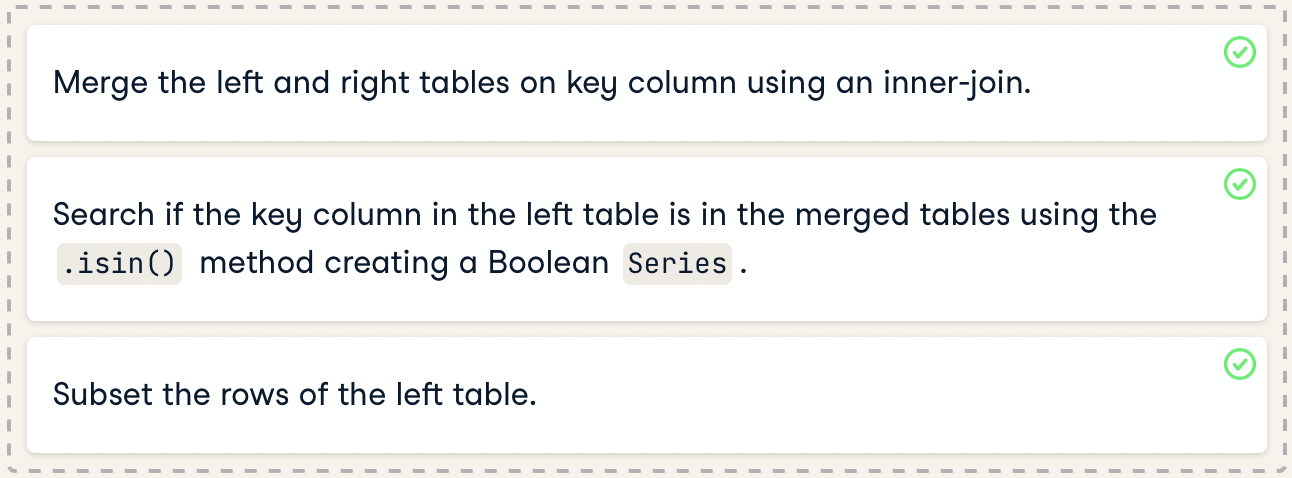


## Performing an anti-join

In our music streaming company dataset, each customer is assigned an employee representative to assist them. In this exercise, filter the employee table by a table of top customers, returning only those employees who are **not** assigned to a customer. The results should resemble the results of an anti-join. The company's leadership will assign these employees additional training so that they can work with high valued customers.

The `top_cust` and `employees` tables have been provided for you.

In [1]:
import pandas as pd
top_cust = pd.read_csv('datasets/top_cust.csv',index_col=0)
employees = pd.read_csv('datasets/employees.csv',index_col=0)

### Instructions 1/3
Merge `employees` and `top_cust` with a left join, setting indicator argument to True. Save the result to `empl_cust`.

In [2]:
print(employees.columns)
print('\n')
print(top_cust.columns)

Index(['srid', 'lname', 'fname', 'title', 'hire_date', 'email'], dtype='object')


Index(['cid', 'srid', 'fname', 'lname', 'phone', 'fax', 'email'], dtype='object')


In [3]:
empl_cust = employees.merge(top_cust, how = 'left', on = 'srid', indicator=True)
empl_cust.head()

,srid,lname_x,fname_x,title,hire_date,email_x,cid,fname_y,lname_y,phone,fax,email_y,_merge
0,1,Adams,Andrew,General Manager,2002-08-14,andrew@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,2,Edwards,Nancy,Sales Manager,2002-05-01,nancy@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,3,Peacock,Jane,Sales Support Agent,2002-04-01,jane@chinookcorp.com,1.0,Luís,Gonçalves,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,both
3,3,Peacock,Jane,Sales Support Agent,2002-04-01,jane@chinookcorp.com,3.0,François,Tremblay,+1 (514) 721-4711,NaN,ftremblay@gmail.com,both
4,3,Peacock,Jane,Sales Support Agent,2002-04-01,jane@chinookcorp.com,12.0,Roberto,Almeida,+55 (21) 2271-7000,+55 (21) 2271-7070,roberto.almeida@riotur.gov.br,both


### Instructions 2/3
Select the `srid` column of `empl_cust` and the rows where `_merge` is `'left_only'`. Save the result to `srid_list`.

In [4]:
srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only','srid']
srid_list.head()

0     1
1     2
61    6
62    7
63    8
Name: srid, dtype: int64

### Instructions 3/3
Subset the `employees` table and select those rows where the `srid` is in the variable `srid_list` and print the results.

In [5]:
empl_no_cust = employees[employees['srid'].isin(srid_list)]
empl_no_cust

,srid,lname,fname,title,hire_date,email
0,1,Adams,Andrew,General Manager,2002-08-14,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,2002-05-01,nancy@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,2003-10-17,michael@chinookcorp.com
6,7,King,Robert,IT Staff,2004-01-02,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,2004-03-04,laura@chinookcorp.com


You performed an `anti-join` by first merging the tables with a left join, selecting the ID of those employees who did not support a top customer, and then subsetting the original employee's table. From that, we can see that there are five employees not supporting top customers. Anti-joins are a powerful tool to filter a main table (i.e. `employees`) by another (i.e. `customers`).

## Performing a semi-join

Some of the tracks that have generated the most significant amount of revenue are from TV-shows or are other non-musical audio. You have been given a table of invoices that include top revenue-generating items. Additionally, you have a table of non-musical tracks from the streaming service. In this exercise, you'll use a semi-join to find the top revenue-generating non-musical tracks..

The tables `non_mus_tcks`, `top_invoices`, and `genres` have been loaded for you.

In [6]:
top_invoices = pd.read_excel('datasets/top_invoices.xlsx')
top_invoices.to_csv('datasets/top_invoices.csv')

In [7]:
non_mus_tcks = pd.read_csv('datasets/non_mus_tcks.csv',index_col=0)#.astype({'tid':float})
top_invoices = pd.read_csv('datasets/top_invoices.csv', index_col=0)#.astype({'tid':float})
genres = pd.read_csv('datasets/genres.csv', index_col=0)

### Instructions

- Merge `non_mus_tcks` and `top_invoices` on `tid` using an `inner join`. Save the result as `tracks_invoices`.
- Use `.isin()` to subset the rows of `non_mus_tck` where `tid` is in the `tid` column of `tracks_invoices`. Save the result as `top_tracks`.
- Group `top_tracks` by `gid` and `count` the `tid rows`. Save the result to `cnt_by_gid`.
- Merge `cnt_by_gid` with the `genres` table on gid and print the result.

In [8]:
# Lets check the columns name of the trhee datasets
print(non_mus_tcks.columns)
print(top_invoices.columns)
print(genres.columns)

Index(['tid', 'name', 'aid', 'mtid', 'gid', 'u_price'], dtype='object')
Index(['ilid', 'iid', 'tid', 'uprice', 'quantity'], dtype='object')
Index(['gid', 'name'], dtype='object')


In [9]:
# Inner Join the non_mus_tcks and top_invoices datasets as tracks_invoices
tracks_invoices = non_mus_tcks.merge(top_invoices, on = 'tid', how = 'inner')
tracks_invoices.head(1)

,tid,name,aid,mtid,gid,u_price,ilid,iid,uprice,quantity
0,2850,The Fix,228,3,21,1.99,473,88,1.99,1


In [10]:
# Subset non_mus_tcks with tid present inside the tracks_invoices
top_tracks = non_mus_tcks[non_mus_tcks['tid'].isin(tracks_invoices['tid'])]

In [11]:
# When grouping the top_tracks we need to specify that gid shouldn't be the new index.
cnt_by_gid = top_tracks.groupby(['gid'], as_index=False).agg({'tid':'count'})
cnt_by_gid.head()

,gid,tid
0,19,4
1,21,2
2,22,1


In [12]:
print(cnt_by_gid.merge(genres, on='gid'))

   gid  tid      name
0   19    4  TV Shows
1   21    2     Drama
2   22    1    Comedy


In this exercise, you replicated a semi-join to filter the table of tracks by the table of invoice items to find the top revenue non-musical tracks. With some additional data manipulation, you discovered that 'TV-shows' is the non-musical genre that has the most top revenue-generating tracks. Now that you've done both semi- and anti-joins, it's time to move to the next topic.

## Concatenation basics

You have been given a few tables of data with musical track info for different albums from the metal band, Metallica. The track info comes from their Ride The Lightning, Master Of Puppets, and St. Anger albums. Try various features of the `.concat()` method by concatenating the tables vertically together in different ways.

The tables `tracks_master`, `tracks_ride`, and `tracks_st` have loaded for you.

In [13]:
tracks_master = pd.read_excel('datasets/tracks_master.xlsx')
tracks_master.to_csv('datasets/tracks_master.csv')

tracks_ride = pd.read_excel('datasets/tracks_ride.xlsx')
tracks_ride.to_csv('datasets/tracks_ride.csv')

tracks_st = pd.read_excel('datasets/tracks_st.xlsx')
tracks_st.to_csv('datasets/tracks_st.csv')

In [14]:
tracks_master = pd.read_csv('datasets/tracks_master.csv', index_col=0)
tracks_ride = pd.read_csv('datasets/tracks_ride.csv', index_col=0)
tracks_st = pd.read_csv('datasets/tracks_st.csv', index_col=0)

In [15]:
tracks_master.head(1)

,tid,name,aid,mtid,gid,composer,u_price
0,1853,Battery,152,1,3,J.Hetfield/L.Ulrich,0.99


In [16]:
tracks_ride.head(1)

,tid,name,aid,mtid,gid,u_price
0,1874,Fight Fire With Fire,154,1,3,0.99


In [17]:
tracks_st.head(1)

,tid,name,aid,mtid,gid,u_price
0,1882,Frantic,155,1,3,0.99


### Instructions 1/3
Concatenate `tracks_master`, `tracks_ride`, and `tracks_st`, in that order, setting sort to True.

In [18]:
tracks_from_albums = pd.concat([tracks_master,tracks_ride,tracks_st], sort=True)
tracks_from_albums

,aid,composer,gid,mtid,name,tid,u_price
0,152,J.Hetfield/L.Ulrich,3,1,Battery,1853,0.99
1,152,K.Hammett,3,1,Master Of Puppets,1854,0.99
2,152,J.Hetfield/L.Ulrich,3,1,Disposable Heroes,1857,0.99
0,154,NaN,3,1,Fight Fire With Fire,1874,0.99
1,154,NaN,3,1,Ride The Lightning,1875,0.99
2,154,NaN,3,1,For Whom The Bell Tolls,1876,0.99
3,154,NaN,3,1,Fade To Black,1877,0.99
4,154,NaN,3,1,Trapped Under Ice,1878,0.99
0,155,NaN,3,1,Frantic,1882,0.99
1,155,NaN,3,1,St. Anger,1883,0.99


### Instructions 2/3
Concatenate `tracks_master`, `tracks_ride`, and `tracks_st`, where the index goes from 0 to n-1.

In [19]:
tracks_from_albums = pd.concat([tracks_master,tracks_ride,tracks_st], sort=True, ignore_index=True)
tracks_from_albums

,aid,composer,gid,mtid,name,tid,u_price
0,152,J.Hetfield/L.Ulrich,3,1,Battery,1853,0.99
1,152,K.Hammett,3,1,Master Of Puppets,1854,0.99
2,152,J.Hetfield/L.Ulrich,3,1,Disposable Heroes,1857,0.99
3,154,NaN,3,1,Fight Fire With Fire,1874,0.99
4,154,NaN,3,1,Ride The Lightning,1875,0.99
5,154,NaN,3,1,For Whom The Bell Tolls,1876,0.99
6,154,NaN,3,1,Fade To Black,1877,0.99
7,154,NaN,3,1,Trapped Under Ice,1878,0.99
8,155,NaN,3,1,Frantic,1882,0.99
9,155,NaN,3,1,St. Anger,1883,0.99


### Instructions 3/3
Concatenate `tracks_master`, `tracks_ride`, and `tracks_st`, showing only columns that are in all tables.

In [20]:
tracks_from_albums = pd.concat([tracks_master,tracks_ride,tracks_st], sort=True, ignore_index=True, join= 'inner')
tracks_from_albums

,aid,gid,mtid,name,tid,u_price
0,152,3,1,Battery,1853,0.99
1,152,3,1,Master Of Puppets,1854,0.99
2,152,3,1,Disposable Heroes,1857,0.99
3,154,3,1,Fight Fire With Fire,1874,0.99
4,154,3,1,Ride The Lightning,1875,0.99
5,154,3,1,For Whom The Bell Tolls,1876,0.99
6,154,3,1,Fade To Black,1877,0.99
7,154,3,1,Trapped Under Ice,1878,0.99
8,155,3,1,Frantic,1882,0.99
9,155,3,1,St. Anger,1883,0.99


You've concatenated your first set of tables, adjusted the index, and altered the columns shown in the output. The `.concat()` method is a very flexible tool that is useful for combining data into a new dataset.

## Concatenating with keys

The leadership of the music streaming company has come to you and asked you for assistance in analyzing sales for a recent business quarter. They would like to know which month in the quarter saw the highest average invoice total. You have been given three tables with invoice data named `inv_jul`, `inv_aug`, and `inv_sep`. Concatenate these tables into one to create a graph of the average monthly invoice total.

In [21]:
inv_jul = pd.read_excel('datasets/inv_jul.xlsx')
inv_jul.to_csv('datasets/inv_jul.csv')
inv_aug = pd.read_excel('datasets/inv_aug.xlsx')
inv_aug.to_csv('datasets/inv_aug.csv')
inv_sep = pd.read_excel('datasets/inv_sep.xlsx')
inv_sep.to_csv('datasets/inv_sep.csv')

In [22]:
inv_jul = pd.read_csv('datasets/inv_jul.csv', index_col=0)
inv_aug = pd.read_csv('datasets/inv_aug.csv', index_col=0)
inv_sep = pd.read_csv('datasets/inv_sep.csv', index_col=0)

In [23]:
inv_jul.head(1)

,iid,cid,invoice_date,total,bill_ctry
0,42,51,2009-07-06,1.98,Sweden


In [24]:
inv_aug.head(1)

,iid,cid,invoice_date,total,bill_ctry
0,49,30,2009-08-06,1.98,Canada


In [25]:
inv_sep.head(1)

,iid,cid,invoice_date,total,bill_ctry
0,56,9,2009-09-06,1.98,Denmark


### Instructions
- Concatenate the three tables together vertically in order with the oldest month first, adding `'7Jul'`, `'8Aug'`, and `'9Sep'` as keys for their respective months, and save to variable `inv_jul_thr_sep`.
- Use the `.agg()` method to find the average of the `total` column from the grouped invoices, and save to `avg_inv_by_month`.
- Create a bar chart of `avg_inv_by_month`.

In [26]:
import matplotlib.pyplot as plt
inv_jul_thr_sep = pd.concat([inv_jul,inv_aug,inv_sep], keys=['7 Jul','8 Aug','9 Sep'])
inv_jul_thr_sep.head()

iid  cid invoice_date  total       bill_ctry
7 Jul 0   42   51   2009-07-06   1.98          Sweden
      1   43   53   2009-07-06   1.98              UK
      2   44   55   2009-07-07   3.96       Australia
      3   45   59   2009-07-08   5.94           India
      4   46    6   2009-07-11   8.91  Czech Republic

In [27]:
avg_inv_by_month = inv_jul_thr_sep.groupby(level=0).agg({'total':'mean'})
avg_inv_by_month

,total
7 Jul,5.431429
8 Aug,5.660000
9 Sep,5.945455


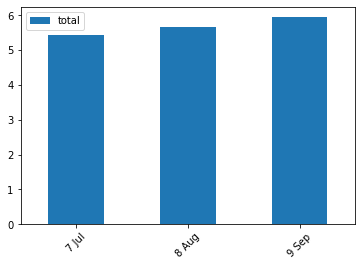

In [28]:
avg_inv_by_month.plot(kind = 'bar', rot = 45)
plt.show()

## Using the append method

The `.concat()` method is excellent when you need a lot of control over how concatenation is performed. However, if you do not need as much control, then the `.append()` method is another option. You'll try this method out by appending the track lists together from different Metallica albums. From there, you will merge it with the `invoice_items` table to determine which track sold the most.

The tables `tracks_master`, `tracks_ride`, `tracks_st`, and `invoice_items` have loaded for you.

In [29]:
invoice_items = pd.read_excel('datasets/invoice_items.xlsx')
invoice_items.to_csv('datasets/invoice_items.csv')

In [30]:
tracks_master = pd.read_csv('datasets/tracks_master.csv', index_col=0)
tracks_ride = pd.read_csv('datasets/tracks_ride.csv', index_col=0)
tracks_st = pd.read_csv('datasets/tracks_st.csv', index_col=0)
invoice_items = pd.read_csv('datasets/invoice_items.csv', index_col=0)

### Instructions
- Use the `.append()` method to combine (in this order) `tracks_ride`, `tracks_master`, and `tracks_st` together vertically, and save to `metallica_tracks`.
- Merge `metallica_tracks` and `invoice_items` on `tid` with an `inner join`, and save to `tracks_invoices`.
- For each `tid` and `name` in `tracks_invoices`, `sum` the `quantity sold` column, and save as `tracks_sold`.
- Sort `tracks_sold` in `descending` order by the quantity column, and print the table.

In [31]:
metallica_tracks = tracks_ride.append([tracks_master,tracks_st],sort=False)
metallica_tracks.head(2)

,tid,name,aid,mtid,gid,u_price,composer
0,1874,Fight Fire With Fire,154,1,3,0.99,NaN
1,1875,Ride The Lightning,154,1,3,0.99,NaN


In [32]:
tracks_invoices = metallica_tracks.merge(invoice_items, how='inner', on = 'tid')
tracks_invoices.head(2)

,tid,name,aid,mtid,gid,u_price,composer,ilid,iid,uprice,quantity
0,1875,Ride The Lightning,154,1,3,0.99,NaN,887,165,0.99,1
1,1876,For Whom The Bell Tolls,154,1,3,0.99,NaN,312,59,0.99,1


In [33]:
tracks_sold = tracks_invoices.groupby(['tid','name']).agg({'quantity':'sum'})
tracks_sold

,,quantity
tid,name,
1853,Battery,2
1854,Master Of Puppets,1
1857,Disposable Heroes,1
1875,Ride The Lightning,1
1876,For Whom The Bell Tolls,2
1877,Fade To Black,1
1882,Frantic,1
1884,Some Kind Of Monster,1
1886,Invisible Kid,1


In [34]:
tracks_sold.sort_values(['quantity'], ascending=False)

,,quantity
tid,name,
1853,Battery,2
1876,For Whom The Bell Tolls,2
1854,Master Of Puppets,1
1857,Disposable Heroes,1
1875,Ride The Lightning,1
1877,Fade To Black,1
1882,Frantic,1
1884,Some Kind Of Monster,1
1886,Invisible Kid,1


## Concatenate and merge to find common songs

The senior leadership of the streaming service is requesting your help again. You are given the historical files for a popular playlist in the classical music genre in 2018 and 2019. Additionally, you are given a similar set of files for the most popular pop music genre playlist on the streaming service in 2018 and 2019. Your goal is to concatenate the respective files to make a large classical playlist table and overall popular music table. Then filter the classical music table using a semi-join to return only the most popular classical music tracks.

The tables `classic_18`, `classic_19`, and `pop_18`, `pop_19` have been loaded for you. Additionally, pandas has been loaded as pd.

In [35]:
classic_18 = pd.read_excel('datasets/classic_18.xlsx')
classic_18.to_csv('datasets/classic_18.csv')

classic_19 = pd.read_excel('datasets/classic_19.xlsx')
classic_19.to_csv('datasets/classic_19.csv')

pop_18 = pd.read_excel('datasets/pop_18.xlsx')
pop_18.to_csv('datasets/pop_18.csv')

pop_19 = pd.read_excel('datasets/pop_19.xlsx')
pop_19.to_csv('datasets/pop_19.csv')

In [36]:
classic_18 = pd.read_csv('datasets/classic_18.csv', index_col=0)
classic_19 = pd.read_csv('datasets/classic_19.csv', index_col=0)
pop_18 = pd.read_csv('datasets/pop_18.csv', index_col=0)
pop_19 = pd.read_csv('datasets/pop_19.csv', index_col=0)

### Instructions 1/2
- Concatenate the `classic_18` and `classic_19` tables vertically where the index goes from 0 to n-1, and save to `classic_18_19`.
- Concatenate the `pop_18` and `pop_19` tables vertically where the index goes from 0 to n-1, and save to `pop_18_19`.

In [37]:
classic_18.head(2)

,pid,tid
0,12,3483
1,12,3416


In [38]:
classic_19.head(2)

,pid,tid
0,12,3482
1,12,3434


In [39]:
classic_18_19 = pd.concat([classic_18,classic_19], ignore_index=True)
classic_18_19.head(2)

,pid,tid
0,12,3483
1,12,3416


In [40]:
pop_18_19 = pd.concat([pop_18,pop_19], ignore_index=True)
pop_18_19.head(2)

,pid,tid
0,1,3063
1,1,2712


### Instructions 2/2
- With `classic_18_19` on the left, merge it with `pop_18_19` on `tid` using an `inner join`.
- Use `.isin()` to filter `classic_18_19` where `tid` is in `classic_pop`.

In [41]:
classic_pop = classic_18_19.merge(pop_18_19, on = 'tid')
classic_pop

,pid_x,tid,pid_y
0,12,3479,1
1,12,3439,1
2,12,3445,1
3,12,3449,1
4,12,3437,1
5,12,3435,1


In [42]:
popular_classic = classic_18_19[classic_18_19['tid'].isin(classic_pop['tid'])]
popular_classic

,pid,tid
3,12,3479
10,12,3439
21,12,3445
23,12,3449
48,12,3437
50,12,3435


In this exercise, you demonstrated many of the concepts discussed in this chapter, including concatenation, and semi-joins. You now have experience combining data vertically and using semi- and anti-joins. Time to move on to the next chapter!